# Introduction to tesseract by [NeuralNine](https://www.youtube.com/@NeuralNine)

In [31]:
# import packages
import pytesseract
import PIL.Image
import cv2
import os

os.chdir("C:/Users/BM/python_ocr")

In [2]:
"""
$ tesseract --help-psm
Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.
"""

"""
OCR Engine modes:
0    Legacy engine only.
1    Neural nets LSTM engine only.
2    Legacy + LSTM engines.
3    Default, based on what is available.
"""

'\nOCR Engine modes:\n0    Legacy engine only.\n1    Neural nets LSTM engine only.\n2    Legacy + LSTM engines.\n3    Default, based on what is available.\n'

In [3]:
# set configs settings
myconfig = r"--psm 1 --oem 3"

text = pytesseract.image_to_string(PIL.Image.open("anime_test_1.jpg"), config=myconfig)
print(text)

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy




## plot rectangles around characters


In [4]:
# open the image in opencv2 
img = cv2.imread("anime_test_1.jpg")
height, width, _ = img.shape


In [5]:

# convert image to boxes
boxes = pytesseract.image_to_boxes(img, config=myconfig)
print(boxes)



S 61 544 73 561 0
p 72 539 82 561 0
r 77 539 97 557 0
i 100 544 103 561 0
n 106 544 116 557 0
g 119 539 130 557 0
1 138 544 143 561 0
9 148 544 160 561 0
9 162 544 174 561 0
9 176 544 188 561 0
« 196 549 203 556 0
5 213 544 224 561 0
4 226 544 240 561 0
e 248 544 259 557 0
p 262 539 272 557 0
i 275 544 278 561 0
s 280 544 289 557 0
o 291 544 302 557 0
d 305 544 316 561 0
e 318 544 329 557 0
s 331 544 340 557 0
D 65 466 102 512 0
i 107 466 116 513 0
g 122 453 151 500 0
i 158 466 167 513 0
m 175 466 222 500 0
o 210 453 240 513 0
n 227 465 258 500 0
: 264 465 309 500 0
D 329 453 343 513 0
i 329 466 366 512 0
g 371 453 414 513 0
i 400 453 424 513 0
t 422 465 455 513 0
a 446 453 470 513 0
l 459 465 502 513 0
M 65 395 107 441 0
o 97 394 129 442 0
n 113 394 144 429 0
s 151 395 179 429 0
t 185 394 210 429 0
e 215 394 236 442 0
r 238 394 268 429 0
s 274 394 323 429 0
T 61 338 78 361 0
o 78 338 93 355 0
e 96 338 110 355 0
i 114 338 118 361 0
A 128 338 148 360 0
n 151 338 165 355 0
i 169 338 173 

as you can see, each text is placed inside a box, in a sense.



| Letter | Top Left (X, Y) | Bottom Right (X, Y) |
|--------|---------------|--------------------|
| S      | 61, 544       | 73, 561            |
| p      | 72, 539       | 82, 561            |
| r      | 77, 539       | 97, 557            |
| i      | 100, 544      | 103, 561           |
| n      | 106, 544      | 116, 557           |
| g      | 119, 539      | 130, 557           |




In [6]:
# drawing over the co-ordinates
for box in boxes.splitlines():
    box = box.split(" ")
    top_left = (int(box[1]), height - int(box[2]))
    bottom_right = (int(box[3])), height - int(box[4])
    color = (0, 255, 0)
    img = cv2.rectangle(img, (int(box[1]), height - int(box[2])), (int(box[3]), height - int(box[4])), (0, 255, 0), 2)

cv2.imshow("img", img)
cv2.waitKey(0)

-1

this is what we got

![Screenshot 2023-07-31 135111.png](<attachment:Screenshot 2023-07-31 135111.png>)

"As you can see, we've highlighted all the important (viewable) text for you. Oh, and those Japanese characters on the flyer? Yeah, we don't need those. Haha, you can ignore those funny symbols, folks! 😄


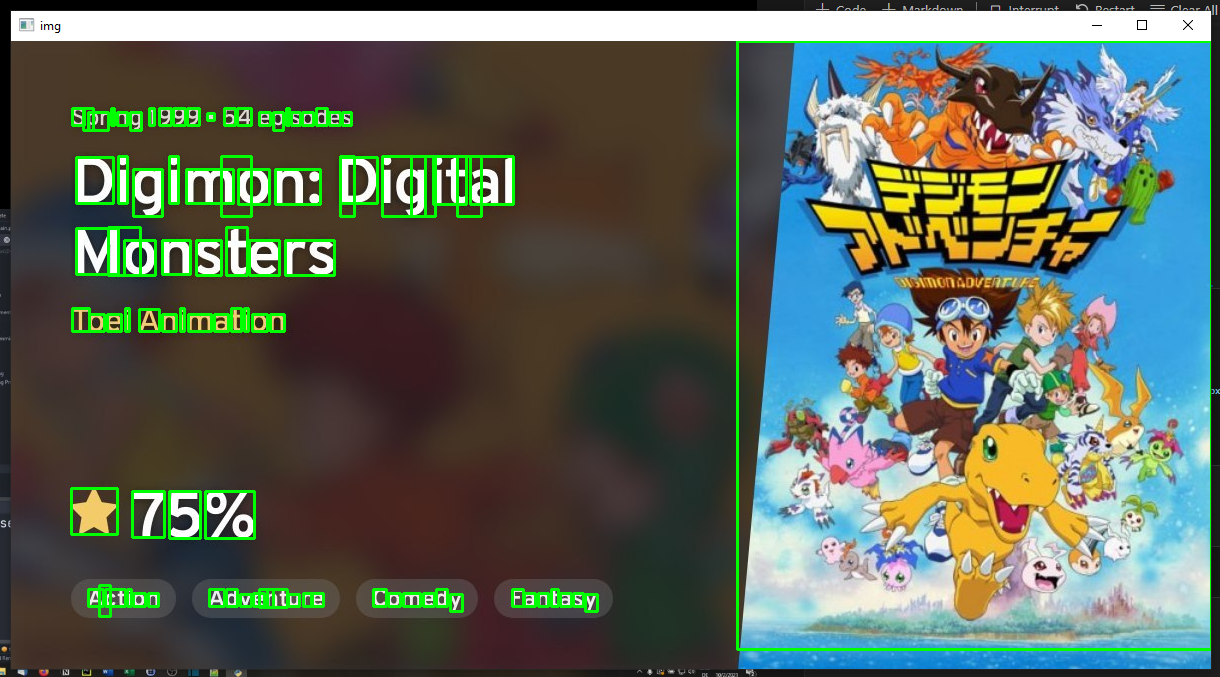

## recognize words

In [7]:
from pytesseract import Output

data = pytesseract.image_to_data(img, config=myconfig, output_type=Output.DICT)

print(data.keys())
print(data['text'])
print(data['conf'])

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
['', '', '', '', 'Digimon:', 'Digital', '', 'Monsters', '', '', '', 'Toei', 'Ainimation', '', '', '', '*', '75%', '', '', '', 'A:tion', 'Adventure', 'Comedy,', 'Fantasy', '', '', '', '']
[-1, -1, -1, -1, 95, 96, -1, 96, -1, -1, -1, 63, 38, -1, -1, -1, 18, 78, -1, -1, -1, 3, 41, 87, 0, -1, -1, -1, 95]


In [8]:
# printing each word against its confidence level
amount_boxes = len(data['text'])
for i in range(amount_boxes):
    print(f'{data["text"][i]}, {data["conf"][i]} ')

, -1 
, -1 
, -1 
, -1 
Digimon:, 95 
Digital, 96 
, -1 
Monsters, 96 
, -1 
, -1 
, -1 
Toei, 63 
Ainimation, 38 
, -1 
, -1 
, -1 
*, 18 
75%, 78 
, -1 
, -1 
, -1 
A:tion, 3 
Adventure, 41 
Comedy,, 87 
Fantasy, 0 
, -1 
, -1 
, -1 
, 95 


```console
, -1 
, -1 
, -1 
, -1 
Digimon:, 95 
Digital, 96 
, -1 
Monsters, 96 
, -1 
, -1 
, -1 
Toei, 63 
Ainimation, 38 
, -1 
, -1 
, -1 
*, 18 
75%, 78 
, -1 
, -1 
, -1 
A:tion, 3 
Adventure, 41 
Comedy,, 87 
Fantasy, 0 
, -1 
, -1 
, -1 
, 95 
```

As you can see, when using dictionaries, the confidence of recognizing words tends to drop, and mistakes may occur. Therefore, I would prefer to work with individual letters instead.




## Conclusion
We have decided to use individual letters for the OCR analysis on each image. This choice aims to enhance accuracy and minimize potential errors that could occur when using dictionaries for recognizing entire words. By focusing on individual letters, we can ensure a more reliable and effective text extraction process for our project.


# Using OCR on anime alpha images
## step 1: identifying text in images

In [9]:
text = pytesseract.image_to_string(PIL.Image.open("anime_test_1.jpg"), config=myconfig)
print(text)

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy




```console
Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy
```


We know that the first line is supposed to indicate when the anime came out, along with the number of episodes. The second line and/or third line contain the title of the anime and the studio. The fourth line represents the viewer rating, and the last line contains the genre of the anime.

We are also aware that our folder contains a mix of non-recognizable photos and recognizable photos with anime titles. To address this, my plan is to test the OCR process on 5 anime photos, analyze the results, and get the precise location of the details. Subsequently, I will store the extracted details along with the image file names somewhere, such as in a database or CSV file.

### converting all 6 test images to text

In [10]:
filenames = ["anime_test_1.jpg", "anime_test_2.jpg", "anime_test_3.jpg", "anime_test_4.jpg", "anime_test_5.jpg", "anime_test_6.jpg"]

for filename in filenames:
    text = pytesseract.image_to_string(PIL.Image.open(filename), config=myconfig)
    print(text)
    print("...................................")

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy


...................................
2021

The World Ends With
You: The Animation

Shin-Ei Animation

Action Supernatural


...................................
Spring 2009 « 26 episodes
Phantom: Requiem for
the Phantom

Bee Train

® 76%

Action Drama Thriller


...................................
Slime Taoshite 300-
nen, Shiranai Uchi ni
Level Max ni...

Adventure Fantasy Slice of Life ie io BID IZ ~
Wysoe SUC


...................................
Spring 2015 « 12 episodes
Yamada and the Seven
Witches

LIDENFILMS

® 74%

Comedy Mystery Romance Supernatural


...................................
Summer 2019 « 12 episodes

To the Abandoned
Sacred Beasts

MAPPA

%® 60%

Action Drama Fantasy Mystery


...................................


we get this

```console
Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy


...................................
2021

The World Ends With
You: The Animation

Shin-Ei Animation

Action Supernatural


...................................
Spring 2009 « 26 episodes
Phantom: Requiem for
the Phantom

Bee Train

® 76%

Action Drama Thriller


...................................
Slime Taoshite 300-
nen, Shiranai Uchi ni
Level Max ni...

Adventure Fantasy Slice of Life ie io BID IZ ~
Wysoe SUC


...................................
Spring 2015 « 12 episodes
Yamada and the Seven
Witches

LIDENFILMS

® 74%

Comedy Mystery Romance Supernatural


...................................
Summer 2019 « 12 episodes

To the Abandoned
Sacred Beasts

MAPPA

%® 60%

Action Drama Fantasy Mystery


...................................
```

Can we instruct Tesseract to recognize only a specific section of the image for text extraction, rather than processing the entire image? We are interested in extracting text from the first 3/4 of the image.

To achieve this, we might need to use OpenCV to determine the precise location where we want to separate the image.


## step 2: cropping out the irrelevant details in images

In [11]:
import cv2

# load images onto cv2
image_paths = ["anime_test_1.jpg", "anime_test_2.jpg", "anime_test_3.jpg", "anime_test_4.jpg", "anime_test_5.jpg", "anime_test_6.jpg"]
images = [cv2.imread(image_path) for image_path in image_paths]

# get the width and heights of image 1 assumming all image sizes are the same
height, width, _ = images[0].shape

# calculate the y co-ordinates for each line (divided into 3)
x_coordinates = [width // 5 * i for i in range(1, 5)]

# use the y co-ordinates to draw green lines on each image 
for x in x_coordinates:
    for image in images:
        cv2.line(image, (x, 0), (x, height), (0, 255, 0), 2)

# display images with green lines 
for i, img in enumerate(images, start=1):
    cv2.imshow(f"image {i}", img)

cv2.waitKey(0)
cv2.destroyAllWindows()




Thanks to this code, we obtained the same output for all 6 images. The lines were drawn at the same points in every image.

![Screenshot 2023-08-01 112708.png](<attachment:Screenshot 2023-08-01 112708.png>)

We are interested in the first 3 sections containing the texts.

Now that we have defined the region of interest, we can use Tesseract to read only the contents we want.
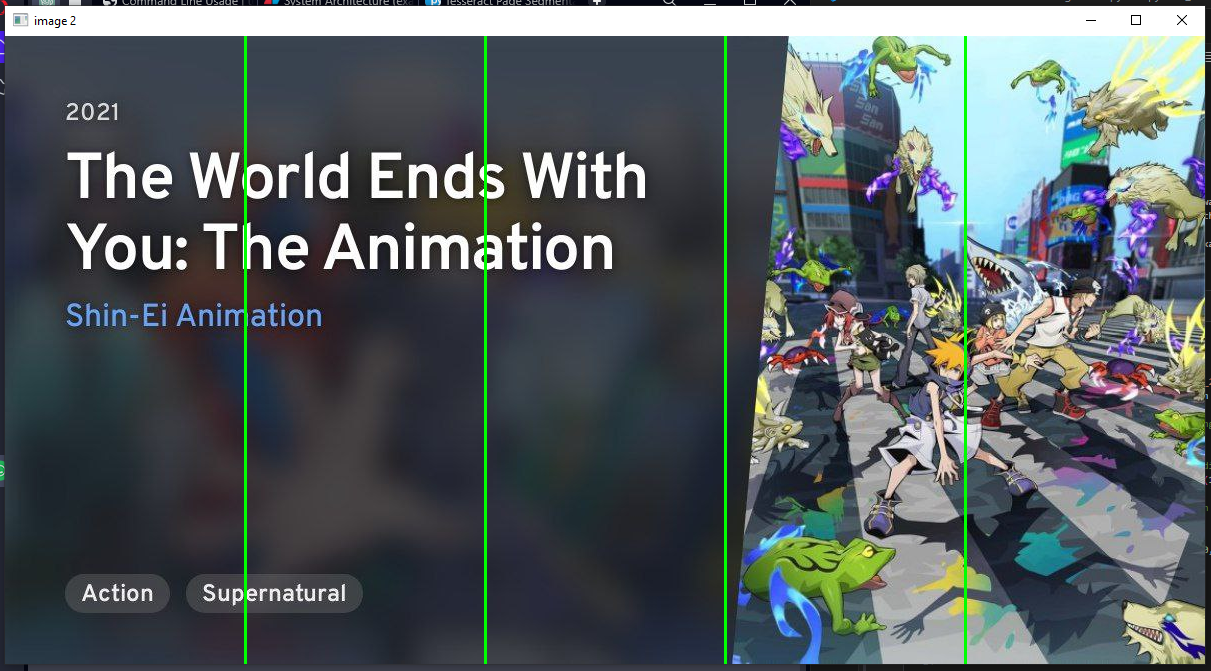

In [12]:
image = PIL.Image.open("anime_test_4.jpg")

width, height = image.size

# ROI = region of interest 
roi = (0, 0, width * 3 // 5, height)

# crop the image to the defined region 
cropped_image = image.crop(roi)

text = pytesseract.image_to_string(cropped_image, config=myconfig,)
print(text)

Slime Taoshite 300-
nen, Shiranai Uchi ni
Level Max ni...

Adventure Fantasy Slice of Life



Now, the images with text on the anime flyer are being ignored.

We are applying this process to all images.

In [13]:
filenames = ["anime_test_1.jpg", "anime_test_2.jpg", "anime_test_3.jpg", "anime_test_4.jpg", "anime_test_5.jpg", "anime_test_6.jpg"]

for filename in filenames:
    image = PIL.Image.open(filename)

    width, height = image.size

    # ROI = region of interest 
    roi = (0, 0, width * 3 // 5, height)

    # crop the image to the defined region 
    cropped_image = image.crop(roi)

    text = pytesseract.image_to_string(cropped_image, config=myconfig,)
    print(text)
    print("...................................")

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

...................................
2021

The World Ends With
You: The Animation

Shin-Ei Animation

Action Supernatural

...................................
Spring 2009 « 26 episodes
Phantom: Requiem for
the Phantom

Bee Train

® 76%

Action Drama Thriller

...................................
Slime Taoshite 300-
nen, Shiranai Uchi ni
Level Max ni...

Adventure Fantasy Slice of Life

...................................
Spring 2015 « 12 episodes
Yamada and the Seven
Witches

LIDENFILMS

® 74%

Comedy Mystery Romance Supernatural

...................................
Summer 2019 « 12 episodes

To the Abandoned
Sacred Beasts

MAPPA

%® 60%

Action Drama Fantasy Mystery

...................................


```console
Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

...................................
2021

The World Ends With
You: The Animation

Shin-Ei Animation

Action Supernatural

...................................
Spring 2009 « 26 episodes
Phantom: Requiem for
the Phantom

Bee Train

® 76%

Action Drama Thriller

...................................
Slime Taoshite 300-
nen, Shiranai Uchi ni
Level Max ni...

Adventure Fantasy Slice of Life

...................................
Spring 2015 « 12 episodes
Yamada and the Seven
Witches

LIDENFILMS

® 74%

Comedy Mystery Romance Supernatural

...................................
Summer 2019 « 12 episodes

To the Abandoned
Sacred Beasts

MAPPA

%® 60%

Action Drama Fantasy Mystery

...................................
```

the texts look all cleaned up. 

## step 3: divide texts into year of release, episodes, titles, rating and genres

A new problem has arisen where the year of release, number of episodes, viewer rating, and genres remain constant, but the height of the title varies. We need to divide the images heightwise to investigate this further and find a solution.

In [14]:
import cv2

# load images onto cv2
image_paths = ["anime_test_1.jpg", "anime_test_2.jpg", "anime_test_3.jpg", "anime_test_4.jpg", "anime_test_5.jpg", "anime_test_6.jpg"]
images = [cv2.imread(image_path) for image_path in image_paths]

# get the width and heights of image 1 assumming all image sizes are the same
height, width, _ = images[0].shape

# calculate the y co-ordinates for each line (divided into 3)
y_coordinates = [height // 6 * i for i in range(1, 6)]

# use the y co-ordinates to draw green lines on each image 
for y in y_coordinates:
    for image in images:
        cv2.line(image, (0, y), (width, y), (0, 255, 0), 2)

# display images with green lines 
for i, img in enumerate(images, start=1):
    cv2.imshow(f"image {i}", img)

cv2.waitKey(0)
cv2.destroyAllWindows()


Great news! It appears that if we divide the image into 6 equal parts, the first, fifth, and sixth parts remain constant, while the second, third, and fourth texts vary in width. This insight should help us handle the variations in the title's height effectively.

![Screenshot 2023-08-01 132148.png](<attachment:Screenshot 2023-08-01 132148.png>)
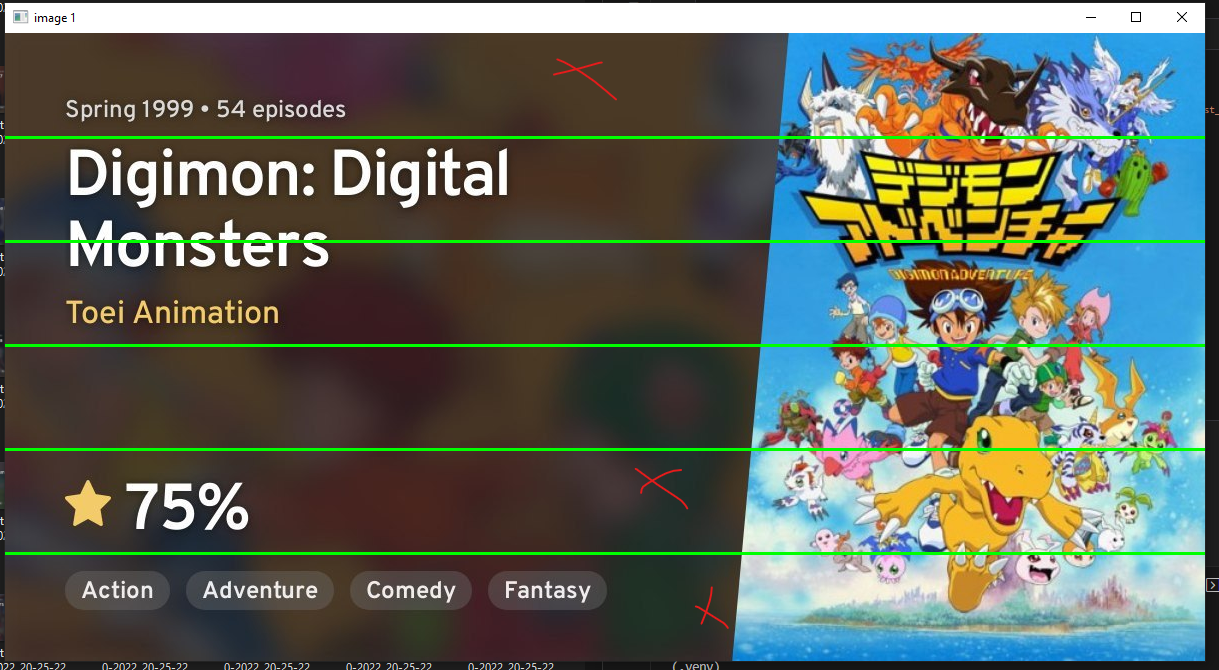

Exactly! By cropping out the specific parts containing the year + episodes, rating, and genres, we can focus on the relevant information that remains constant across the images. This approach should help us accurately extract and handle the required details without being affected by the variations in the title's height.

### getting the year + episodes, rating, and genres

In [15]:
image = PIL.Image.open("anime_test_1.jpg")

width, height = image.size

# ROI = region of interest 
roi = (0, 0, width * 3 // 5, height)

# crop the image to the defined region 
cropped_image = image.crop(roi)

width_c, height_c = cropped_image.size


# Crop the image to the defined region 
sector_height = height_c // 6
roi_1 = (0, 0, width_c, sector_height)
roi_5 = (0, 4 * sector_height, width_c, 5 * sector_height)
roi_6 = (0, 5* sector_height, width_c, height_c)

# Perform OCR on the entire cropped image
text = pytesseract.image_to_string(cropped_image, config=myconfig)
print(text)
print("........................")

# Use the already cropped regions for OCR
year_episodes_image = cropped_image.crop(roi_1)
rating_image = cropped_image.crop(roi_5)
genre_image = cropped_image.crop(roi_6)

year_episodes_text = pytesseract.image_to_string(year_episodes_image, config=myconfig)
rating_text = pytesseract.image_to_string(rating_image, config=myconfig)
genre_text = pytesseract.image_to_string(genre_image, config=myconfig)

print(year_episodes_text)
print(rating_text)
print(genre_text)

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

........................
Spring 1999 « 54 episodes

*% 75%

Action Adventure Comedy Fantasy




So far, we have completed the following steps for one image:

1. Loaded the image using PIL (Python Imaging Library).
2. Defined a Region of Interest (ROI) to extract the first three-fifths of the image's width.
3. Cropped the image to the defined ROI to focus on the relevant region for text extraction.
4. Divided the cropped region into six equal parts heightwise to identify the first, fifth, and sixth sectors.
5. Performed OCR on the entire cropped image to extract overall information.
6. Used the cropped regions (first, fifth, and sixth sectors) to perform separate OCR for specific text details.
7. Printed the extracted information.

Now, we need to repeat these steps for all six images in our dataset. By applying the same process to each image, we can consistently extract and organize the relevant text details across the entire dataset. This will help us achieve a comprehensive analysis of the information contained in each image.

In [16]:
# load images onto cv2
image_paths = ["anime_test_1.jpg", "anime_test_2.jpg", "anime_test_3.jpg", "anime_test_4.jpg", "anime_test_5.jpg", "anime_test_6.jpg"]

images = [PIL.Image.open(item) for item in image_paths]

for image in images:
    width, height = image.size

    # ROI = region of interest 
    roi = (0, 0, width * 3 // 5, height)

    # crop the image to the defined region 
    cropped_image = image.crop(roi)

    width_c, height_c = cropped_image.size


    # Crop the image to the defined region 
    sector_height = height_c // 6
    roi_1 = (0, 0, width_c, sector_height)
    roi_5 = (0, 4 * sector_height, width_c, 5 * sector_height)
    roi_6 = (0, 5* sector_height, width_c, height_c)

    # Perform OCR on the entire cropped image
    text = pytesseract.image_to_string(cropped_image, config=myconfig)
    print(text)
    print("........................")

    # Use the already cropped regions for OCR
    year_episodes_image = cropped_image.crop(roi_1)
    rating_image = cropped_image.crop(roi_5)
    genre_image = cropped_image.crop(roi_6)

    year_episodes_text = pytesseract.image_to_string(year_episodes_image, config=myconfig)
    rating_text = pytesseract.image_to_string(rating_image, config=myconfig)
    genre_text = pytesseract.image_to_string(genre_image, config=myconfig)

    print(year_episodes_text)
    print(rating_text)
    print(genre_text)
    print("-------------------------------------------------------------")

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

........................
Spring 1999 « 54 episodes

*% 75%

Action Adventure Comedy Fantasy

-------------------------------------------------------------
2021

The World Ends With
You: The Animation

Shin-Ei Animation

Action Supernatural

........................
2021


Action Supernatural

-------------------------------------------------------------
Spring 2009 « 26 episodes
Phantom: Requiem for
the Phantom

Bee Train

® 76%

Action Drama Thriller

........................
Spring 2009 « 26 episodes

® 76%

Action Drama Thriller

-------------------------------------------------------------
Slime Taoshite 300-
nen, Shiranai Uchi ni
Level Max ni...

Adventure Fantasy Slice of Life

........................


Adventure Fantasy Slice of Life

-------------------------------------------------------------
Spring 2015 « 12 episodes
Yamada and the Seven
Witches

LIDENFILMS

® 74%



```console
Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

........................
Spring 1999 « 54 episodes

*% 75%

Action Adventure Comedy Fantasy

-------------------------------------------------------------
```

Out of the 6 images, only 4 succeeded in printing the required text fields. However, the remaining 2 images have either incomplete details or missing information. Nevertheless, a win is a win



### how to get the titles of the images

we are interested in the second and third strip 



In [34]:
image = PIL.Image.open("anime_test_1.jpg")

width, height = image.size

# ROI = region of interest 
roi = (0, 0, width * 3 // 5, height)

# crop the image to the defined region 
cropped_image = image.crop(roi)

width_c, height_c = cropped_image.size


# Crop the image to the defined region 
sector_height = height_c // 6
roi_1 = (0, 0, width_c, sector_height)
roi_2_3 = (0, sector_height, width_c, 4 * sector_height)
roi_5 = (0, 4 * sector_height, width_c, 5 * sector_height)
roi_6 = (0, 5* sector_height, width_c, height_c)

# Perform OCR on the entire cropped image
text = pytesseract.image_to_string(cropped_image, config=myconfig)
print(text)
print("........................")

# Use the already cropped regions for OCR
year_episodes_image = cropped_image.crop(roi_1)
title_image = cropped_image.crop(roi_2_3)
rating_image = cropped_image.crop(roi_5)
genre_image = cropped_image.crop(roi_6)

year_episodes_text = pytesseract.image_to_string(year_episodes_image, config=myconfig)
title_text = pytesseract.image_to_string(title_image, config=myconfig)
rating_text = pytesseract.image_to_string(rating_image, config=myconfig)
genre_text = pytesseract.image_to_string(genre_image, config=myconfig)

print(year_episodes_text)
print(title_text)
print(rating_text)
print(genre_text)

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

........................
Spring 1999 « 54 episodes

Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy



I am not sure how I will be able to separate the title from its animation studio. Let's observe how the process unfolds with the analysis of 6 images. 

In [18]:
# load images onto cv2
image_paths = ["anime_test_1.jpg", "anime_test_2.jpg", "anime_test_3.jpg", "anime_test_4.jpg", "anime_test_5.jpg", "anime_test_6.jpg"]

images = [PIL.Image.open(item) for item in image_paths]

for image in images:
    width, height = image.size

    # ROI = region of interest 
    roi = (0, 0, width * 3 // 5, height)

    # crop the image to the defined region 
    cropped_image = image.crop(roi)

    width_c, height_c = cropped_image.size


    # Crop the image to the defined region 
    sector_height = height_c // 6
    roi_1 = (0, 0, width_c, sector_height)
    roi_2_3 = (0, sector_height, width_c, 4 * sector_height)
    roi_5 = (0, 4 * sector_height, width_c, 5 * sector_height)
    roi_6 = (0, 5* sector_height, width_c, height_c)

    # Perform OCR on the entire cropped image
    text = pytesseract.image_to_string(cropped_image, config=myconfig)
    print(text)
    print("........................")

    # Use the already cropped regions for OCR
    year_episodes_image = cropped_image.crop(roi_1)
    title_image = cropped_image.crop(roi_2_3)
    rating_image = cropped_image.crop(roi_5)
    genre_image = cropped_image.crop(roi_6)

    year_episodes_text = pytesseract.image_to_string(year_episodes_image, config=myconfig)
    title_text = pytesseract.image_to_string(title_image, config=myconfig)
    rating_text = pytesseract.image_to_string(rating_image, config=myconfig)
    genre_text = pytesseract.image_to_string(genre_image, config=myconfig)

    print(year_episodes_text)
    print(title_text)
    print(rating_text)
    print(genre_text)
    print("-------------------------------------------------------------")

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

........................
Spring 1999 « 54 episodes

Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

-------------------------------------------------------------
2021

The World Ends With
You: The Animation

Shin-Ei Animation

Action Supernatural

........................
2021

The World Ends With
You: The Animation

Shin-Ei Animation


Action Supernatural

-------------------------------------------------------------
Spring 2009 « 26 episodes
Phantom: Requiem for
the Phantom

Bee Train

® 76%

Action Drama Thriller

........................
Spring 2009 « 26 episodes

Phantom: Requiem for
the Phantom

Bee Train

® 76%

Action Drama Thriller

-------------------------------------------------------------
Slime Taoshite 300-
nen, Shiranai Uchi ni
Level Max ni...

Adventure Fantasy Slice of Life

........................

WIIIIN FQVOTIILS GUY
nen

The only incorrect title identified was for image 4, which displayed as "slime no shitara." Now that we have a better understanding of the concept, let's proceed to apply the process to all images. It's great that you have already cleaned the images to remove those without descriptions. By analyzing the entire set of images, we can further refine our approach and ensure more accurate and consistent results. Let's continue the analysis with the cleaned images to achieve our objectives effectively.

#### forgotten item, splitting year and no of episodes

In [32]:
image = PIL.Image.open("anime_test_1.jpg")

width, height = image.size

# ROI = region of interest 
roi = (0, 0, width * 3 // 5, height)

# crop the image to the defined region 
cropped_image = image.crop(roi)

width_c, height_c = cropped_image.size


# Crop the image to the defined region 
sector_height = height_c // 6
roi_1 = (0, 0, width_c, sector_height)


# Perform OCR on the entire cropped image
text = pytesseract.image_to_string(cropped_image, config=myconfig)
print(text)
print("........................")

# Use the already cropped regions for OCR
year_episodes_image = cropped_image.crop(roi_1)


year_episodes_text = pytesseract.image_to_string(year_episodes_image, config=myconfig)
year_episodes_text_split = year_episodes_text.split("«")
year_text = year_episodes_text_split[0].strip()
episodes_text = year_episodes_text_split[1].strip()


print(year_text)
print(episodes_text)

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

........................
Spring 1999
54 episodes


##### doing the same for all 6 images
For now, I have chosen not to split the genres since there are approximately 20 different genres, and accounting for all 20 columns can be complex and time-consuming. Instead, I will focus on extracting and storing the other essential details, such as the year of release, number of episodes, title, animation studio, and viewer rating. This way, we can still proceed with the analysis and gather valuable information without overwhelming the process. We can always revisit the genre handling in the future if needed.

In [33]:
# load images onto cv2
image_paths = ["anime_test_1.jpg", "anime_test_2.jpg", "anime_test_3.jpg", "anime_test_4.jpg", "anime_test_5.jpg", "anime_test_6.jpg"]

images = [PIL.Image.open(item) for item in image_paths]

for image in images:
    width, height = image.size

    # ROI = region of interest 
    roi = (0, 0, width * 3 // 5, height)

    # crop the image to the defined region 
    cropped_image = image.crop(roi)

    width_c, height_c = cropped_image.size


    # Crop the image to the defined region 
    sector_height = height_c // 6
    roi_1 = (0, 0, width_c, sector_height)
    roi_2_3 = (0, sector_height, width_c, 4 * sector_height)
    roi_5 = (0, 4 * sector_height, width_c, 5 * sector_height)
    roi_6 = (0, 5* sector_height, width_c, height_c)

    # Perform OCR on the entire cropped image
    text = pytesseract.image_to_string(cropped_image, config=myconfig)
    print(text)
    print("........................")

    # Use the already cropped regions for OCR
    year_episodes_image = cropped_image.crop(roi_1)
    title_image = cropped_image.crop(roi_2_3)
    rating_image = cropped_image.crop(roi_5)
    genre_image = cropped_image.crop(roi_6)

    year_episodes_text = pytesseract.image_to_string(year_episodes_image, config=myconfig)
    title_text = pytesseract.image_to_string(title_image, config=myconfig)
    rating_text = pytesseract.image_to_string(rating_image, config=myconfig)
    genre_text = pytesseract.image_to_string(genre_image, config=myconfig)

    # extract year and episodes from the year_episodes_text
    year_episodes_split = year_episodes_text.split("«")
    if len(year_episodes_split) == 2:
        year_text = year_episodes_text_split[0].strip()
        episodes_text = year_episodes_text_split[1].strip()
    elif len(year_episodes_split) == 1:
        year_text = year_episodes_text
        episodes_text = "not defined"
    else:
        year_text = "not defined"
        episodes_text = "not defined"


    print(year_text)
    print(episodes_text)
    print(title_text)
    print(rating_text)
    print(genre_text)
    print("-------------------------------------------------------------")

Spring 1999 « 54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

........................
Spring 1999
54 episodes
Digimon: Digital
Monsters

Toei Animation

*% 75%

Action Adventure Comedy Fantasy

-------------------------------------------------------------
2021

The World Ends With
You: The Animation

Shin-Ei Animation

Action Supernatural

........................
2021

not defined
The World Ends With
You: The Animation

Shin-Ei Animation


Action Supernatural

-------------------------------------------------------------
Spring 2009 « 26 episodes
Phantom: Requiem for
the Phantom

Bee Train

® 76%

Action Drama Thriller

........................
Spring 1999
54 episodes
Phantom: Requiem for
the Phantom

Bee Train

® 76%

Action Drama Thriller

-------------------------------------------------------------
Slime Taoshite 300-
nen, Shiranai Uchi ni
Level Max ni...

Adventure Fantasy Slice of Life

........................

not defined
WIIIIN

## step 4 dealing with the files in a folder

To view the anime photos stored inside the folder "photos," you can refer to this helpful video tutorial: [link](https://www.youtube.com/watch?v=NOvFZamGXXo). The video should provide step-by-step guidance on how to access and visualize the images in the specified folder. Happy learning!



### i. print location of current python file

In [23]:
# import necessary module for daling with files 
import os

# print the location of this file
print(os.getcwd())

C:\Users\BM\python_ocr\anime_alpha_photos\photos


### ii. open the folder where the photos are located


In [24]:
os.chdir("C:/Users/BM/python_ocr/anime_alpha_photos/photos")
print(os.getcwd())

C:\Users\BM\python_ocr\anime_alpha_photos\photos


i should rename the folder tosomething pyreadable

### iii. use a for-loop to loop over the contents in the folder

In [26]:
os.chdir("C:/Users/BM/python_ocr/anime_alpha_photos/photos")

print(os.listdir())

for file in os.listdir():
    print(file)

['photo_1000@02-10-2022_20-28-13.jpg', 'photo_1001@02-10-2022_20-28-13.jpg', 'photo_1002@02-10-2022_20-28-13.jpg', 'photo_1003@02-10-2022_20-28-13.jpg', 'photo_1004@02-10-2022_20-28-13.jpg', 'photo_1005@02-10-2022_20-28-13.jpg', 'photo_1006@02-10-2022_20-28-13.jpg', 'photo_1007@02-10-2022_20-28-13.jpg', 'photo_1008@02-10-2022_20-28-13.jpg', 'photo_1009@02-10-2022_20-28-13.jpg', 'photo_1010@02-10-2022_20-28-13.jpg', 'photo_1011@02-10-2022_20-28-13.jpg', 'photo_1012@02-10-2022_20-28-13.jpg', 'photo_1013@02-10-2022_20-28-13.jpg', 'photo_1014@02-10-2022_20-28-13.jpg', 'photo_1015@02-10-2022_20-28-13.jpg', 'photo_1016@02-10-2022_20-28-13.jpg', 'photo_1017@02-10-2022_20-28-13.jpg', 'photo_1018@02-10-2022_20-28-13.jpg', 'photo_1019@02-10-2022_20-28-13.jpg', 'photo_1020@02-10-2022_20-28-13.jpg', 'photo_1021@02-10-2022_20-28-13.jpg', 'photo_1022@02-10-2022_20-28-13.jpg', 'photo_1023@02-10-2022_20-28-13.jpg', 'photo_1024@02-10-2022_20-28-13.jpg', 'photo_1025@02-10-2022_20-28-13.jpg', 'photo_1026

super👍

## step 5 : push the text data onto pandas table

with pandas we have to
import pandas
create an empty data dframe(or table in sql terms)
add columns which are
year of release and episodes
title
viewer rating
genre
